Read the file "Scroe.csv".

Fill the Null or NA values with average of respective student.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

df = pd.read_csv('Score.csv')

for index, row in df.iterrows():
    mean_score = row[3:].replace(0, np.nan).mean()
    df.iloc[index, 3:] = row[3:].replace(0, np.nan).fillna(mean_score)

Calculate Avgerage of Each student and store in the column named as "Avg"

In [60]:
df['Avg'] = df.iloc[:, 3:].mean(axis=1)

On the basis of Average, calculate the progress of student.



```
if average > 5 then set progress to Good,
else if average == 5 then progress is average
else set progress to below average.
```



In [61]:
def assign_progress(avg):
    if avg > 5:
        return 'Good'
    elif avg == 5:
        return 'average'
    else:
        return 'below average'

df['Progress'] = df['Avg'].apply(assign_progress)

Transform Categorical values into Numerical values.

In [62]:
le = LabelEncoder()
df['Progress'] = le.fit_transform(df['Progress'])

non_numeric_columns = df.select_dtypes(exclude='number').columns

for column in non_numeric_columns:
    df[column] = le.fit_transform(df[column])

print("Columns in DataFrame:", df.columns)

if 'student_id' in df.columns:
    X = df.drop(columns=['student_id', 'Progress'])
else:
    X = df.drop(columns=['Progress'])

y = df['Progress']

Columns in DataFrame: Index(['S.No', 'Subject', 'Section', 'L01', 'L02', 'L03', 'L04', 'L05', 'L06',
       'Avg', 'Progress'],
      dtype='object')


Set the s to all the columns except s.no and progress.

Set the label variable to progress.

Split the dataset into test and train.
  1. 1st time train set is set to 70 and test 30
  2. For second time split into 0.20
  3. For third time split into 1:3


In [63]:
def stratified_split(X, y, test_size=0.30):
    stratified_split = StratifiedKFold(n_splits=int(1 / test_size))
    for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        return X_train, X_test, y_train, y_test

X_train_70, X_test_30, y_train_70, y_test_30 = stratified_split(X, y, test_size=0.30)
X_train_80, X_test_20, y_train_80, y_test_20 = stratified_split(X, y, test_size=0.20)
X_train_75, X_test_25, y_train_75, y_test_25 = stratified_split(X, y, test_size=0.25)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Apply all the Machine algorithm we had covered in our course to predict the progress of student.


In [64]:
def train_n_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

results['70-30'] = {name: train_n_evaluate(model, X_train_70, X_test_30, y_train_70, y_test_30) for name, model in models.items()}
results['80-20'] = {name: train_n_evaluate(model, X_train_80, X_test_20, y_train_80, y_test_20) for name, model in models.items()}
results['75-25'] = {name: train_n_evaluate(model, X_train_75, X_test_25, y_train_75, y_test_25) for name, model in models.items()}

for split, res in results.items():
    print(f"results for {split} split:")
    for model, accuracy in res.items():
        print(f"{model}: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

results for 70-30 split:
Logistic Regression: 0.9473684210526315
Decision Tree: 1.0
Random Forest: 0.9649122807017544
results for 80-20 split:
Logistic Regression: 0.9705882352941176
Decision Tree: 1.0
Random Forest: 0.9705882352941176
results for 75-25 split:
Logistic Regression: 0.9534883720930233
Decision Tree: 1.0
Random Forest: 0.9767441860465116


Self Learn:

Learn a new Machine Learning Algorithm Which is not covered in our course and implement it on our score dataset for the prediction of Progress of student.

In [65]:
gbc = GradientBoostingClassifier()

results['70-30']['Gradient Boosting'] = train_n_evaluate(gbc, X_train_70, X_test_30, y_train_70, y_test_30)
results['80-20']['Gradient Boosting'] = train_n_evaluate(gbc, X_train_80, X_test_20, y_train_80, y_test_20)
results['75-25']['Gradient Boosting'] = train_n_evaluate(gbc, X_train_75, X_test_25, y_train_75, y_test_25)

for split, res in results.items():
    print(f"results for {split} split:")
    for model, accuracy in res.items():
        print(f"{model}: {accuracy}")


results for 70-30 split:
Logistic Regression: 0.9473684210526315
Decision Tree: 1.0
Random Forest: 0.9649122807017544
Gradient Boosting: 1.0
results for 80-20 split:
Logistic Regression: 0.9705882352941176
Decision Tree: 1.0
Random Forest: 0.9705882352941176
Gradient Boosting: 1.0
results for 75-25 split:
Logistic Regression: 0.9534883720930233
Decision Tree: 1.0
Random Forest: 0.9767441860465116
Gradient Boosting: 1.0


#Do's

For each model , use each spliting and get three different results.

Compare the all the model on each spliting.

Result : generate result on the basis of our your thinking.

Visualize your dataset on the each model using matplotlib.

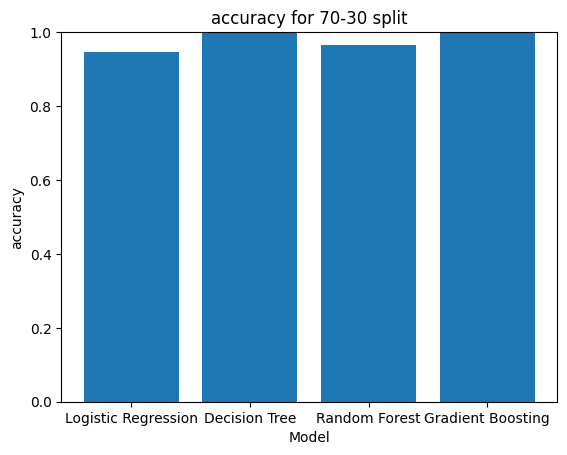

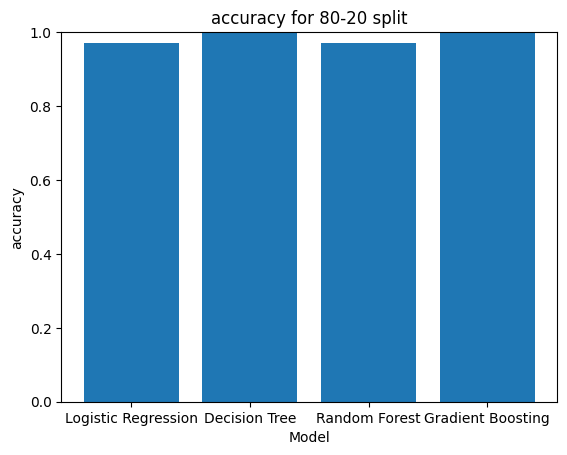

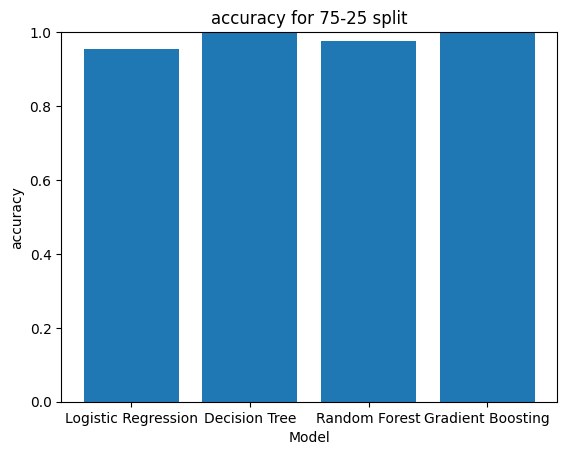

In [66]:
def plot_results(results):
    for split, res in results.items():
        plt.figure()
        plt.title(f"accuracy for {split} split")
        plt.bar(res.keys(), res.values())
        plt.xlabel('Model')
        plt.ylabel('accuracy')
        plt.ylim(0, 1)
        plt.show()

plot_results(results)